In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "../Resources/global_food_wastage_dataset.csv",
    index_col="Country")

# Display sample data
df.head(10)

,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,,
Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01


In [3]:
df.info()
#No Null values-no need for imputation 
#Food Category is a string-May need encoding

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, Australia to France
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5000 non-null   int64  
 1   Food Category              5000 non-null   object 
 2   Total Waste (Tons)         5000 non-null   float64
 3   Economic Loss (Million $)  5000 non-null   float64
 4   Avg Waste per Capita (Kg)  5000 non-null   float64
 5   Population (Million)       5000 non-null   float64
 6   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 312.5+ KB


In [4]:
# Generate summary statistics
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [5]:
#Going to need a scalar

In [6]:
sns.pairplot(data=df)
plt.show()

KeyboardInterrupt: 

In [ ]:
#Look at Economic loss and total waste, strong correlation

In [7]:
df.columns

Index(['Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')

In [20]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features (Age, Fare, Family_Size) (note that for age, we just use the column median, not split by gender)
numeric_features = ['Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features (Sex, Has_Cabin)
binary_features = []
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features (Pclass, Embarked) 
categorical_features = ['Year', 'Food Category']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [9]:
# Correlation Analysis (this is optional and not needed for the ML Experiment)
# It just shows what the data looks like after transformation before training
# We will still declare a full pipeline of preprocessing + training

# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final["Year"] = df.Year.values
df_final.head()

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Food Category_Bakery Items,Food Category_Beverages,Food Category_Dairy Products,Food Category_Frozen Food,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Year
0,-0.406717,-0.434580,-0.708165,-1.537905,0.308676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019
1,-1.484503,-1.412240,1.599429,1.111495,-1.677518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019
2,-1.078486,-1.103413,1.106829,0.744097,-0.170839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022
3,1.491039,1.061068,0.206554,0.612273,-1.565401,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2023
4,0.564094,0.816834,-0.090971,0.990950,-1.207489,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023


In [10]:
corrs = df_final.corr()
corrs

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Food Category_Bakery Items,Food Category_Beverages,Food Category_Dairy Products,Food Category_Frozen Food,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Year
Total Waste (Tons),1.000000,0.974522,0.019987,0.024048,0.010367,-0.004771,0.008554,-0.007621,-0.003575,0.004742,-0.001024,0.004010,-0.008503,0.014298,-0.006233,0.004693,-0.000691,-0.017699,0.008997,0.004438,0.003452
Economic Loss (Million $),0.974522,1.000000,0.017097,0.022253,0.006167,-0.003536,0.012029,-0.011426,-0.003333,0.002956,0.000221,0.003438,-0.009814,0.013556,-0.008367,0.010848,0.004044,-0.022368,0.008525,0.002954,0.002113
Avg Waste per Capita (Kg),0.019987,0.017097,1.000000,-0.029190,-0.019394,-0.004191,-0.012686,0.011049,-0.016789,0.007055,0.001738,0.013793,0.009177,0.004772,0.013619,0.001568,-0.001744,-0.014478,-0.002524,-0.010245,0.013716
Population (Million),0.024048,0.022253,-0.029190,1.000000,-0.004848,-0.007998,-0.008397,0.018386,-0.024447,0.022048,0.000208,0.000627,-0.003610,-0.002502,0.001547,0.029684,-0.005057,-0.006312,0.000071,-0.012667,0.008015
Household Waste (%),0.010367,0.006167,-0.019394,-0.004848,1.000000,0.012589,-0.008376,0.009373,0.000633,0.007648,-0.011897,-0.009778,0.012450,-0.020320,0.019899,-0.005246,0.004159,-0.020602,0.004867,0.004198,-0.013416
Year_2018,-0.004771,-0.003536,-0.004191,-0.007998,0.012589,1.000000,-0.162644,-0.168067,-0.168471,-0.160864,-0.168874,-0.166718,0.015198,0.016353,-0.000394,0.004614,-0.025746,-0.000988,-0.002934,-0.006041,-0.612688
Year_2019,0.008554,0.012029,-0.012686,-0.008397,-0.008376,-0.162644,1.000000,-0.165709,-0.166107,-0.158607,-0.166505,-0.164379,0.008616,0.009877,0.020928,-0.016754,-0.002961,-0.002836,-0.013525,-0.003750,-0.403770
Year_2020,-0.007621,-0.011426,0.011049,0.018386,0.009373,-0.168067,-0.165709,1.000000,-0.171646,-0.163896,-0.172057,-0.169860,-0.003592,0.007762,-0.003547,-0.000236,-0.001106,-0.007469,0.014839,-0.006399,-0.210231
Year_2021,-0.003575,-0.003333,-0.016789,-0.024447,0.000633,-0.168471,-0.166107,-0.171646,1.000000,-0.164290,-0.172470,-0.170268,-0.028071,0.000330,-0.011054,0.009605,0.003402,0.030666,0.000322,-0.003843,-0.003237
Year_2022,0.004742,0.002956,0.007055,0.022048,0.007648,-0.160864,-0.158607,-0.163896,-0.164290,1.000000,-0.164683,-0.162581,-0.000753,-0.016882,-0.013383,-0.006883,0.031777,-0.011021,0.005306,0.011020,0.195040


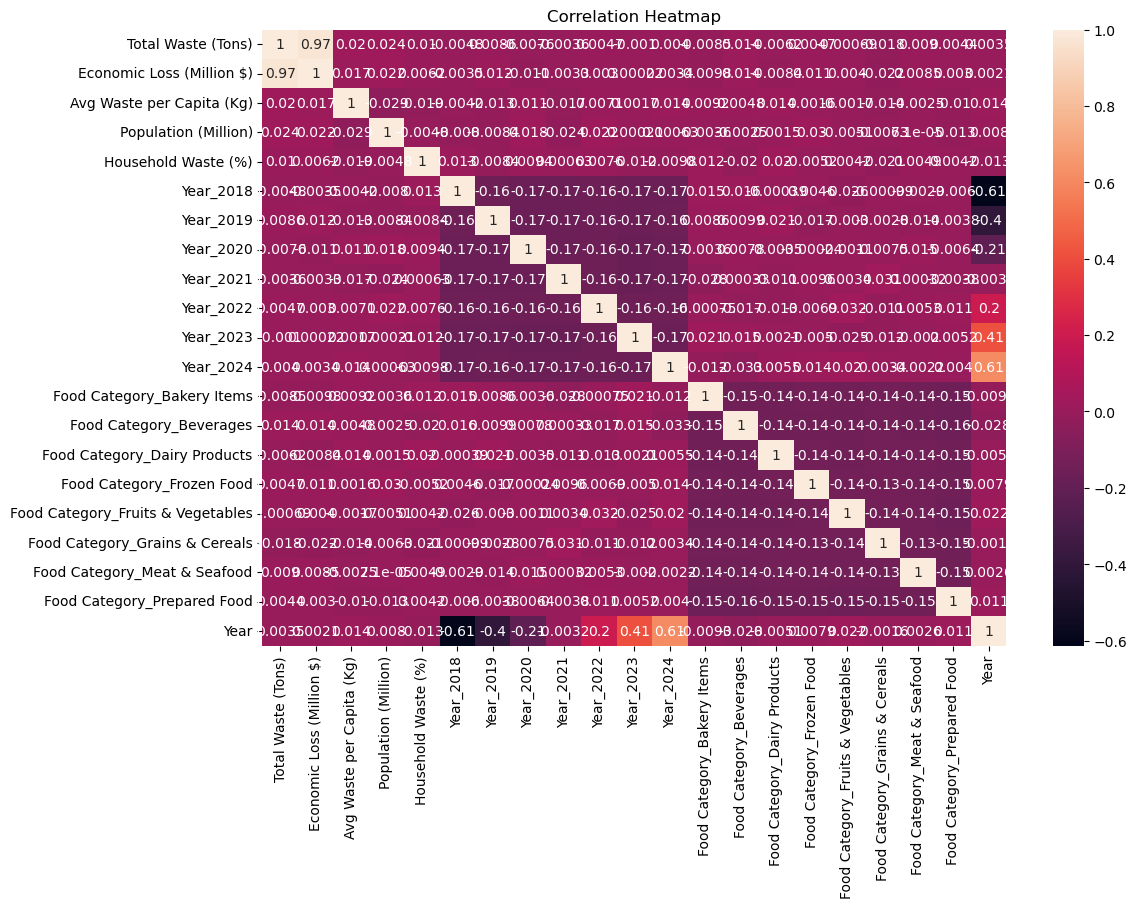

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
abs(corrs["Total Waste (Tons)"]).sort_values(ascending=False) 

Total Waste (Tons)                   1.000000
Economic Loss (Million $)            0.974522
Population (Million)                 0.024048
Avg Waste per Capita (Kg)            0.019987
Food Category_Grains & Cereals       0.017699
Food Category_Beverages              0.014298
Household Waste (%)                  0.010367
Food Category_Meat & Seafood         0.008997
Year_2019                            0.008554
Food Category_Bakery Items           0.008503
Year_2020                            0.007621
Food Category_Dairy Products         0.006233
Year_2018                            0.004771
Year_2022                            0.004742
Food Category_Frozen Food            0.004693
Food Category_Prepared Food          0.004438
Year_2024                            0.004010
Year_2021                            0.003575
Year                                 0.003452
Year_2023                            0.001024
Food Category_Fruits & Vegetables    0.000691
Name: Total Waste (Tons), dtype: f

In [13]:
#Economic Loss has a strong linear correlation. 
#No other strong correlations

In [14]:
df.columns = df.columns.str.strip()


---

### Machine Learning 

---

In [15]:
 # Step 1: Get the Data
X = df.drop(columns=["Total Waste (Tons)"])
y = df["Total Waste (Tons)"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5000, 6)
(3750, 6)
(1250, 6)


In [16]:
X_train.head() # NOTE: THIS IS UNSCALED & UNENCODED 

,Year,Food Category,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,
Brazil,2019,Bakery Items,42234.27,162.25,39.83,45.30
USA,2023,Frozen Food,18712.96,162.09,1231.96,42.06
Australia,2024,Dairy Products,7952.53,27.61,88.75,54.41
Japan,2019,Dairy Products,38702.18,199.40,866.88,39.90
Australia,2023,Bakery Items,12029.98,192.59,682.76,50.71


In [21]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

In [22]:
print(df.shape)

(5000, 7)


TRAIN METRICS
    R2: 0.9488694502069321
    MSE: 10121274.719175158
    RMSE: 3181.3950900784325
    MAE: 2452.8383165533805
    
TEST METRICS
    R2: 0.9522352051714265
    MSE: 10385270.178810729
    RMSE: 3222.618528279562
    MAE: 2500.472353362866
    


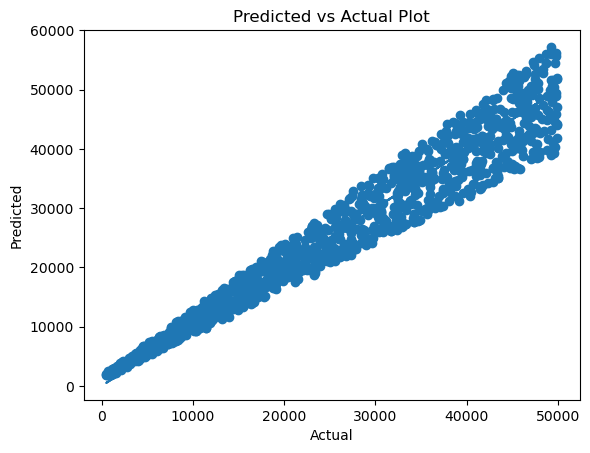

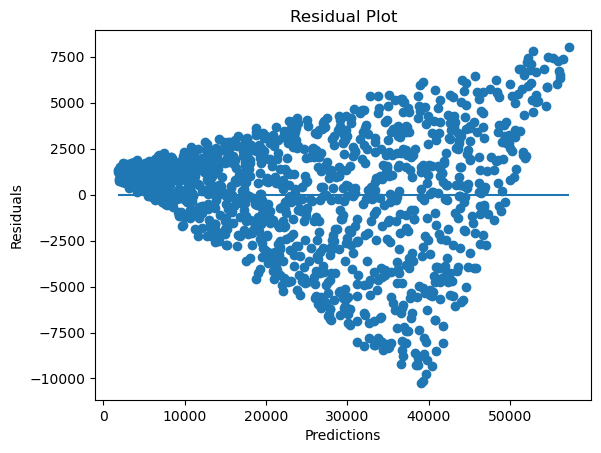

In [23]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

In [ ]:
#Pretty bad heteroscedasticy 

TRAIN METRICS
    R2: 0.9933330383397241
    MSE: 1319722.7641586915
    RMSE: 1148.7918715584174
    MAE: 854.5539811199993
    
TEST METRICS
    R2: 0.9587701481990174
    MSE: 8964408.868964408
    RMSE: 2994.0622687186064
    MAE: 2233.6093416
    


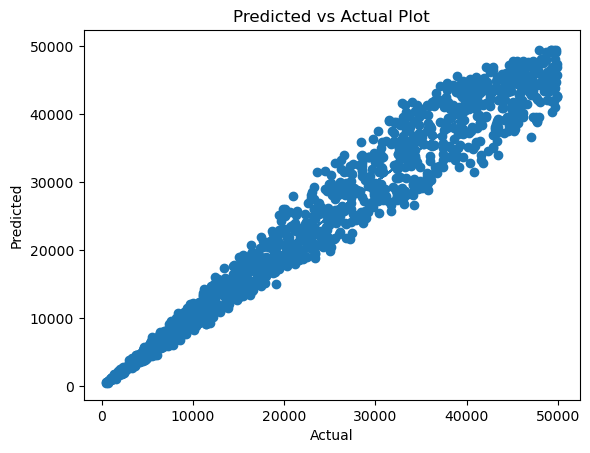

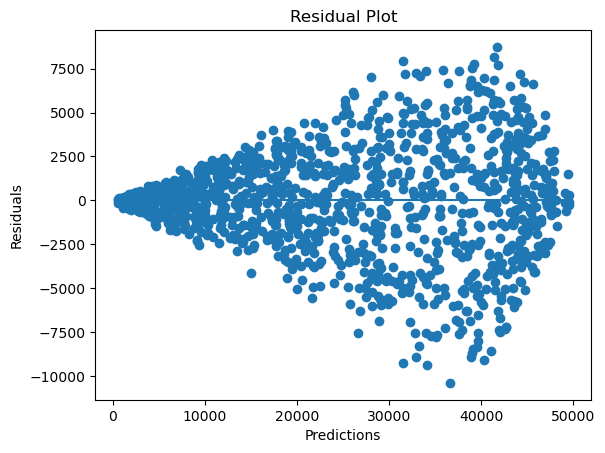

In [24]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)


In [26]:
fi = pd.DataFrame(list(zip(X.columns, rf.named_steps['regressor'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Year,0.966795
2,Economic Loss (Million $),0.008054
1,Food Category,0.007926
3,Avg Waste per Capita (Kg),0.007751
4,Population (Million),0.000658
5,Household Waste (%),0.000639


## Model Productionalization 

In [28]:
# Retrain the model on the ENTIRE dataset
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Economic Loss (Million $)',
                                                   'Avg Waste per Capita (Kg)',
                                                   'Population (Million)',
                                                   'Household Waste (%)']),
                                                 ('binary',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year', 'Food Category'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [29]:
  # Save off my models
import pickle

# Model
pickle.dump(rf, open("foodwaste_model_pipeline.h5", 'wb'))